<a href="https://colab.research.google.com/github/AnnaNasibyan/Python-Project/blob/main/Python_Project_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade scikit-learn

In [ ]:
!pip install nltk spacy gensim networkx matplotlib wordcloud
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 23.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import sklearn
import spacy
import gensim
import networkx
import matplotlib
import wordcloud

print("All libraries imported successfully!")

All libraries imported successfully!


In [47]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive') # Mount Google Drive to access the file

# Paths
metadata_path = '/content/drive/MyDrive/Project/Cleaned/cleaned_data_metadata.csv'

irrelevant_words = ['oil', 'gas', 'mer', 'baxalta', 'monsanto', 'steam', 'trn', 'shire', 'united', 'states','custo', 'siem', 'trn', 'og', 'nv', 'united states']
irrelevant_words_set = set(irrelevant_words)

def clean_text(text, irrelevant_words_set):
    words = text.split()  # Split text into words
    filtered_words = [word for word in words if word not in irrelevant_words_set]
    return ' '.join(filtered_words)

# Load metadata
metadata = pd.read_csv(metadata_path)

# Filter articles by region
us_articles = []
europe_articles = []

for _, row in metadata.iterrows():
    with open(row['Cleaned File Path'], 'r', encoding='utf-8') as f:
        text = f.read()
        if row['Region'] == 'US':
            us_articles.append(text)
        elif row['Region'] == 'Europe':
            europe_articles.append(text)

print(f"US Articles: {len(us_articles)}")
print(f"European Articles: {len(europe_articles)}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
US Articles: 13
European Articles: 16


In [48]:
exclude_words = [
    "siemens", "shire", "dresserrand", "baxalta", "monsanto",
    "company", "arm", "https", "bn", "ge", "sd", "nvidia", "bayer", "alstom", "shires","arms",
    "baxaltas", "bayers", "united", "united states", "year","news", "nvidias","bbc","guardian",
    "states", "including", "reuters", "turbines","trts", "trts","custo", "cookies", "les", "siem"

]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [49]:
import re
from nltk.tokenize import word_tokenize

# Preprocessing function
def preprocess_text(text, exclude_words):
    text = text.lower()  # Lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # Remove special characters
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in exclude_words and len(word) > 2]  # Filter exclusions
    return " ".join(tokens)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [50]:
!pip install nltk
import nltk
nltk.download('punkt_tab')
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter

# Function to compute TF-IDF
def get_top_tfidf_terms(texts, exclude_words, n=20):
    processed_texts = [preprocess_text(text, exclude_words) for text in texts]
    vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2))
    X = vectorizer.fit_transform(processed_texts)
    feature_names = vectorizer.get_feature_names_out()
    tfidf_scores = X.sum(axis=0).A1

    # Sort terms by score
    top_terms = sorted(
        [(term, score) for term, score in zip(feature_names, tfidf_scores)],
        key=lambda x: x[1], reverse=True
    )[:n]
    return top_terms

# Compute top TF-IDF terms
us_tfidf = get_top_tfidf_terms(us_articles, exclude_words, n=20)
europe_tfidf = get_top_tfidf_terms(europe_articles, exclude_words, n=20)

# Display results
print("Top TF-IDF Terms in U.S. Articles:")
for term, score in us_tfidf:
    print(f"{term}: {score:.4f}")

print("\nTop TF-IDF Terms in European Articles:")
for term, score in europe_tfidf:
    print(f"{term}: {score:.4f}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Top TF-IDF Terms in U.S. Articles:
deal: 0.9210
billion: 0.5260
transaction: 0.5212
competition: 0.4734
proposed: 0.4604
divestiture: 0.3483
ftc: 0.3478
companies: 0.3432
crop: 0.3427
power: 0.3391
drugs: 0.3338
phase: 0.3312
combined: 0.3307
companys: 0.3277
statem: 0.3259
shareholders: 0.3232
trump: 0.3198
seed: 0.3050
pres: 0.2925
pharmaceutical: 0.2744

Top TF-IDF Terms in European Articles:
commission: 0.7546
deal: 0.5995
transaction: 0.5841
competition: 0.5545
market: 0.4977
compressor: 0.4485
power: 0.4373
chip: 0.4317
architecture: 0.4202
proposed: 0.3982
billion: 0.3964
source: 0.3940
business: 0.3891
acquisition: 0.3845
turbo: 0.3477
concerns: 0.3431
seeds: 0.3422
likely: 0.3357
innovation: 0.3353
scroll: 0.3327


In [51]:
from sklearn.feature_extraction.text import CountVectorizer

# Function to get filtered n-grams
def get_filtered_ngrams(texts, exclude_words, n=2, top_n=20):
    processed_texts = [preprocess_text(text, exclude_words) for text in texts]
    vectorizer = CountVectorizer(ngram_range=(n, n), stop_words='english')
    X = vectorizer.fit_transform(processed_texts)
    ngram_counts = dict(zip(vectorizer.get_feature_names_out(), X.sum(axis=0).A1))

    # Sort and return top n-grams
    return sorted(ngram_counts.items(), key=lambda x: x[1], reverse=True)[:top_n]

# Compute bigrams
us_bigrams = get_filtered_ngrams(us_articles, exclude_words, n=2)
europe_bigrams = get_filtered_ngrams(europe_articles, exclude_words, n=2)

# Display results
print("Top Bigrams in U.S. Articles:")
print(us_bigrams)

print("\nTop Bigrams in European Articles:")
print(europe_bigrams)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Top Bigrams in U.S. Articles:
[('final judgm', 56), ('federal register', 48), ('aftermarket parts', 38), ('parts service', 36), ('divestiture trustee', 25), ('divestiture assets', 21), ('monitoring trustee', 20), ('proposed final', 20), ('clayton act', 15), ('section clayton', 14), ('trustee shall', 14), ('trt profiles', 11), ('divestiture trustees', 9), ('proposed transaction', 9), ('agricultural biotechnol', 8), ('combined companys', 8), ('competitive impact', 8), ('forwardlooking statem', 8), ('impact statem', 8), ('soybeans canola', 8)]

Top Bigrams in European Articles:
[('turbo compressor', 119), ('compressor trn', 48), ('notifying party', 48), ('commission cons', 40), ('turbo compressors', 36), ('upstream offshore', 36), ('power output', 30), ('market definition', 28), ('product market', 28), ('competitive constrnt', 24), ('ohne werbung', 23), ('notifying partys', 22), ('commissions assessm', 21), ('effective competition', 20), ('market investigation', 20), ('partys view', 18), 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


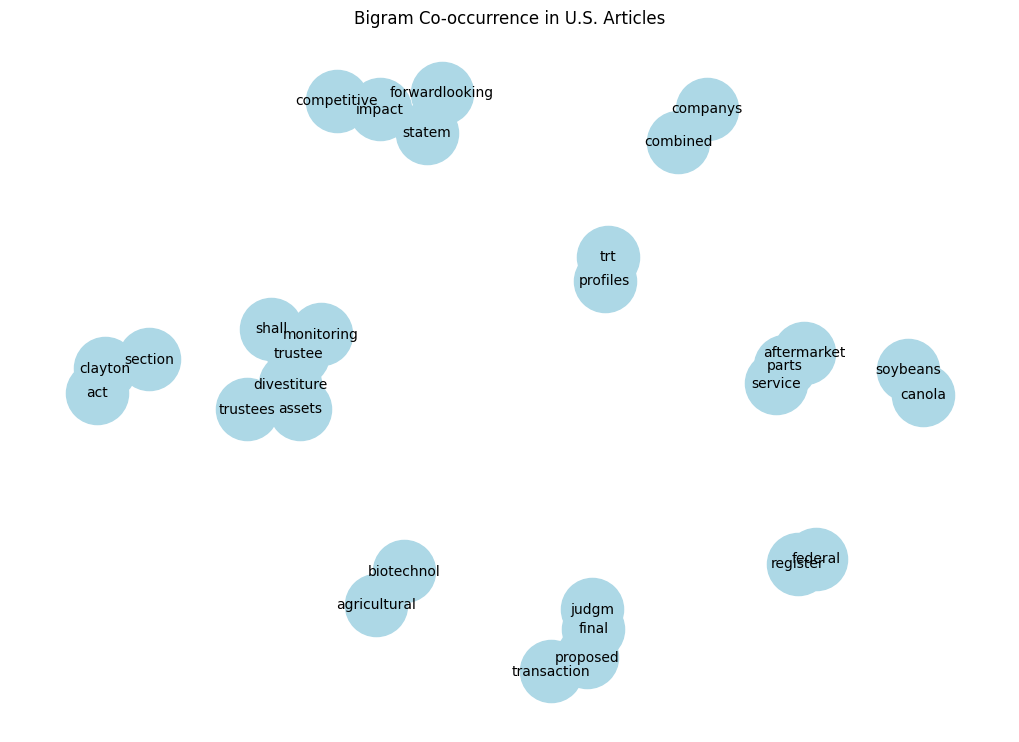

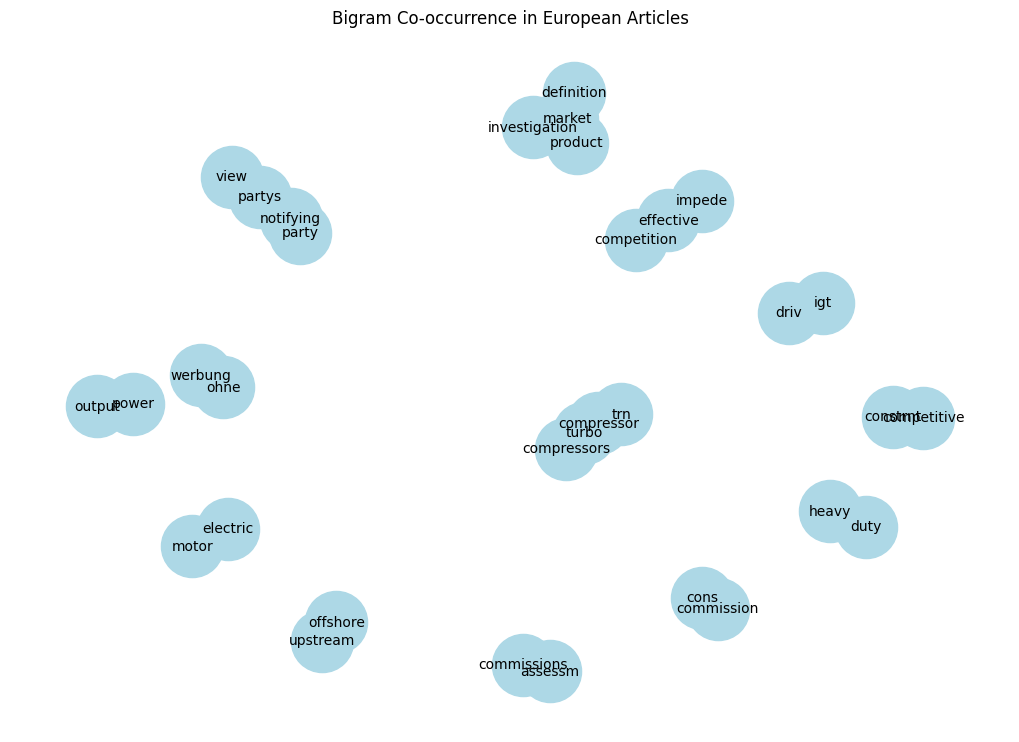

In [52]:
import networkx as nx
import matplotlib.pyplot as plt

# Function to visualize co-occurrence
def visualize_cooccurrence(bigrams, title):
    G = nx.Graph()
    for bigram, weight in bigrams:
        word1, word2 = bigram.split()
        G.add_edge(word1, word2, weight=weight)

    plt.figure(figsize=(10, 7))
    pos = nx.spring_layout(G, k=0.5)
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color="lightblue", font_size=10)
    plt.title(title)
    plt.show()

# Visualize bigram networks
visualize_cooccurrence(us_bigrams, "Bigram Co-occurrence in U.S. Articles")
visualize_cooccurrence(europe_bigrams, "Bigram Co-occurrence in European Articles")

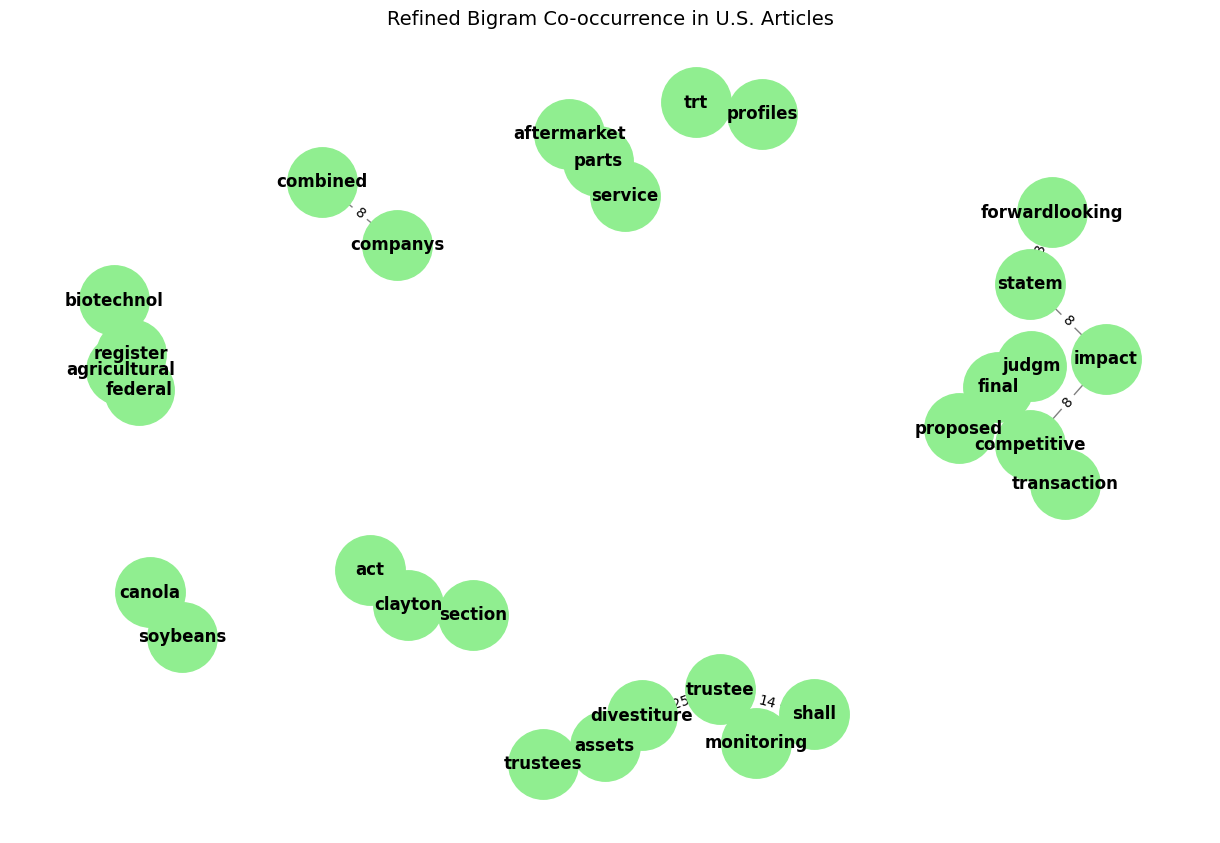

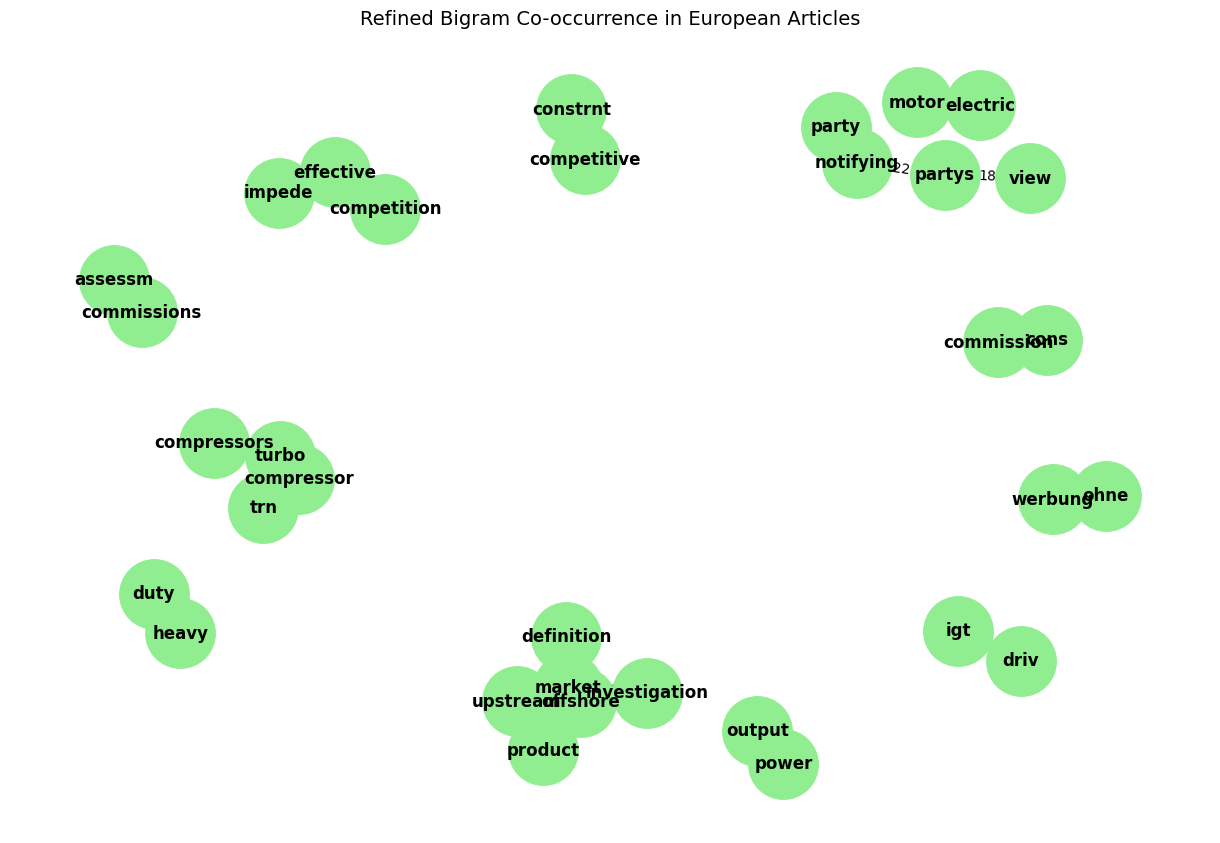

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import community

# Improved Co-occurrence Visualization with Layout and Filtering
def advanced_visualize_cooccurrence(bigrams, title, weight_threshold=2):
    G = nx.Graph()

    # Add edges with weights above a threshold
    for bigram, weight in bigrams:
        if weight >= weight_threshold:
            word1, word2 = bigram.split()
            G.add_edge(word1, word2, weight=weight)

    # Check for isolated nodes and remove them
    G.remove_nodes_from(list(nx.isolates(G)))

    # Layout options
    pos_spring = nx.spring_layout(G, k=0.8, seed=42)  # Force-directed layout
    pos_kamada = nx.kamada_kawai_layout(G)  # Alternative layout

    # Choose layout with fewer overlaps
    pos = pos_spring if len(G.nodes) > 15 else pos_kamada

    # Node and edge visualization
    plt.figure(figsize=(12, 8))
    nx.draw(
        G, pos, with_labels=True, node_size=2500, node_color="lightgreen",
        font_size=12, font_weight="bold", edge_color="gray"
    )

    # Draw edge weights for clarity
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

    # Title and display
    plt.title(title, fontsize=14)
    plt.show()

# Filter and visualize with improved layout
advanced_visualize_cooccurrence(us_bigrams, "Refined Bigram Co-occurrence in U.S. Articles", weight_threshold=3)
advanced_visualize_cooccurrence(europe_bigrams, "Refined Bigram Co-occurrence in European Articles", weight_threshold=3)

In [53]:
from gensim.corpora.dictionary import Dictionary
from gensim.models import LdaModel

# Function for topic modeling
def perform_topic_modeling(texts, exclude_words, num_topics=3):
    processed_texts = [preprocess_text(text, exclude_words).split() for text in texts]
    dictionary = Dictionary(processed_texts)
    corpus = [dictionary.doc2bow(text) for text in processed_texts]
    lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10)

    print("LDA Topics:")
    for idx, topic in lda_model.print_topics():
        print(f"Topic {idx+1}: {topic}")

# Perform topic modeling
print("Topics in U.S. Articles:")
perform_topic_modeling(us_articles, exclude_words, num_topics=3)

print("\nTopics in European Articles:")
perform_topic_modeling(europe_articles, exclude_words, num_topics=3)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topics in U.S. Articles:
LDA Topics:
Topic 1: 0.007*"proposed" + 0.006*"deal" + 0.006*"see" + 0.006*"crop" + 0.006*"competition" + 0.005*"trt" + 0.005*"seed" + 0.005*"innovation" + 0.005*"com" + 0.004*"inc"
Topic 2: 0.013*"divestiture" + 0.010*"def" + 0.010*"judgm" + 0.010*"service" + 0.009*"parts" + 0.009*"final" + 0.008*"court" + 0.008*"federal" + 0.008*"proposed" + 0.007*"trustee"
Topic 3: 0.007*"deal" + 0.006*"drugs" + 0.006*"transaction" + 0.005*"also" + 0.005*"companies" + 0.005*"pres" + 0.004*"competition" + 0.004*"offer" + 0.004*"billion" + 0.004*"hemophilia"

Topics in European Articles:
LDA Topics:
Topic 1: 0.019*"compressor" + 0.015*"market" + 0.015*"turbo" + 0.009*"applications" + 0.009*"commission" + 0.009*"compressors" + 0.008*"power" + 0.007*"trn" + 0.006*"cons" + 0.006*"notifying"
Topic 2: 0.006*"architecture" + 0.006*"would" + 0.005*"says" + 0.005*"competition" + 0.005*"commission" + 0.005*"werbung" + 0.005*"ohne" + 0.004*"also" + 0.004*"seeds" + 0.004*"acquisition"
To

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


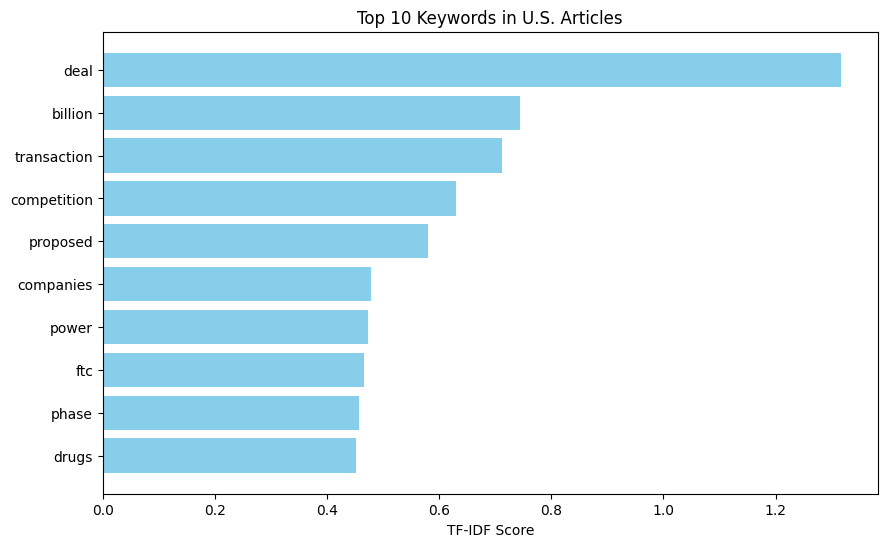

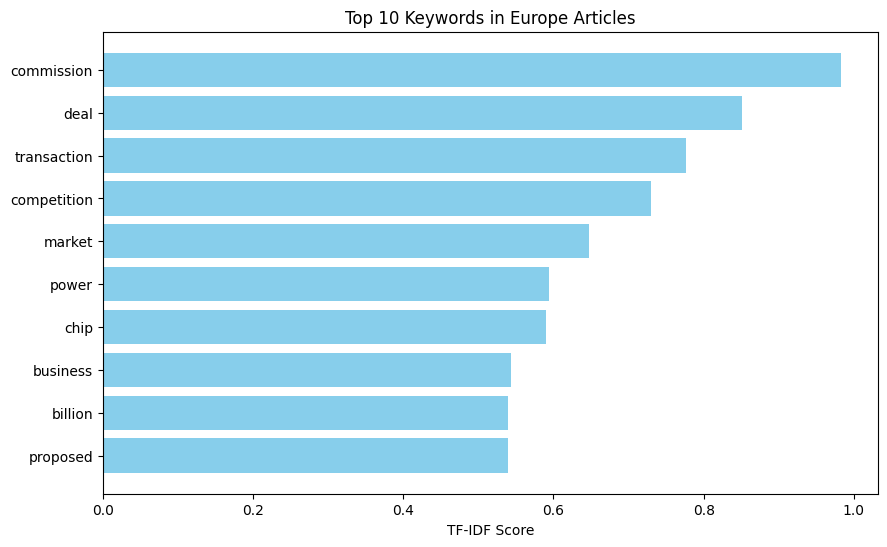

In [54]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Function for TF-IDF Analysis and Visualization
def plot_top_keywords(texts, exclude_words, region_name, top_n=10):
    # Preprocess text
    processed_texts = [" ".join(preprocess_text(text, exclude_words).split()) for text in texts]

    # Compute TF-IDF
    vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 1))
    X = vectorizer.fit_transform(processed_texts)
    feature_names = vectorizer.get_feature_names_out()
    tfidf_scores = X.sum(axis=0).A1

    # Get top keywords
    top_keywords = sorted(
        zip(feature_names, tfidf_scores), key=lambda x: x[1], reverse=True)[:top_n]

    # Plot top keywords
    keywords, scores = zip(*top_keywords)
    plt.figure(figsize=(10, 6))
    plt.barh(keywords, scores, color="skyblue")
    plt.xlabel("TF-IDF Score")
    plt.title(f"Top {top_n} Keywords in {region_name} Articles")
    plt.gca().invert_yaxis()
    plt.show()

# Plot for U.S. and Europe
plot_top_keywords(us_articles, exclude_words, "U.S.")
plot_top_keywords(europe_articles, exclude_words, "Europe")


In [55]:
!pip install pyLDAvis # install pyLDAvis package

import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
from gensim.models import LdaModel
from gensim.corpora.dictionary import Dictionary

# LDA and visualization function
def lda_visualize_topics(texts, exclude_words, region_name, num_topics=3):
    # Preprocess texts
    processed_texts = [preprocess_text(text, exclude_words).split() for text in texts]
    dictionary = Dictionary(processed_texts)
    corpus = [dictionary.doc2bow(text) for text in processed_texts]

    # Train LDA model
    lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10)
    print(f"\nTopics for {region_name} Articles:")
    for idx, topic in lda_model.print_topics():
        print(f"Topic {idx+1}: {topic}")

    # Visualize with pyLDAvis
    vis = gensimvis.prepare(lda_model, corpus, dictionary)
    pyLDAvis.display(vis)

# U.S. and European topics
lda_visualize_topics(us_articles, exclude_words, "U.S.")
lda_visualize_topics(europe_articles, exclude_words, "Europe")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Topics for U.S. Articles:
Topic 1: 0.018*"divestiture" + 0.014*"def" + 0.014*"judgm" + 0.013*"service" + 0.012*"parts" + 0.012*"final" + 0.012*"court" + 0.011*"federal" + 0.010*"trustee" + 0.010*"register"
Topic 2: 0.006*"proposed" + 0.006*"transaction" + 0.005*"competition" + 0.005*"combined" + 0.005*"com" + 0.004*"see" + 0.004*"also" + 0.004*"crop" + 0.004*"innovation" + 0.004*"trt"
Topic 3: 0.009*"deal" + 0.005*"billion" + 0.004*"pharmaceutical" + 0.004*"industry" + 0.004*"plan" + 0.004*"years" + 0.004*"cons" + 0.004*"shareholders" + 0.004*"trump" + 0.003*"statem"

Topics for Europe Articles:
Topic 1: 0.012*"commission" + 0.010*"competition" + 0.006*"would" + 0.006*"concerns" + 0.006*"decision" + 0.005*"european" + 0.005*"site" + 0.005*"seeds" + 0.005*"transaction" + 0.004*"accept"
Topic 2: 0.020*"compressor" + 0.016*"market" + 0.015*"turbo" + 0.010*"applications" + 0.009*"compressors" + 0.009*"commission" + 0.008*"power" + 0.007*"cons" + 0.007*"trn" + 0.007*"notifying"
Topic 3: 0.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


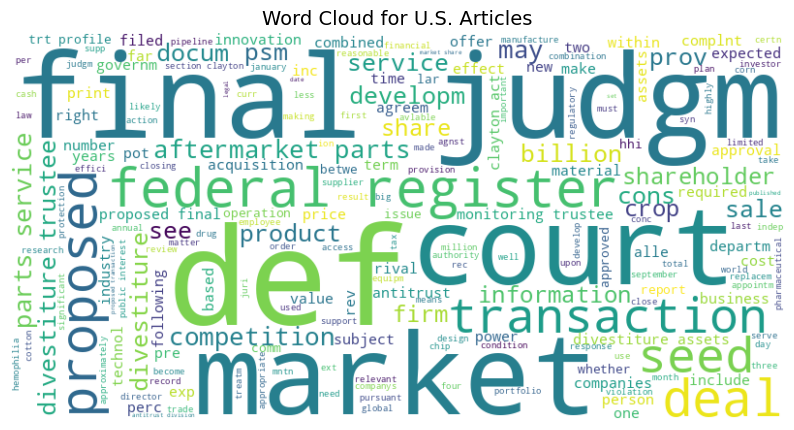

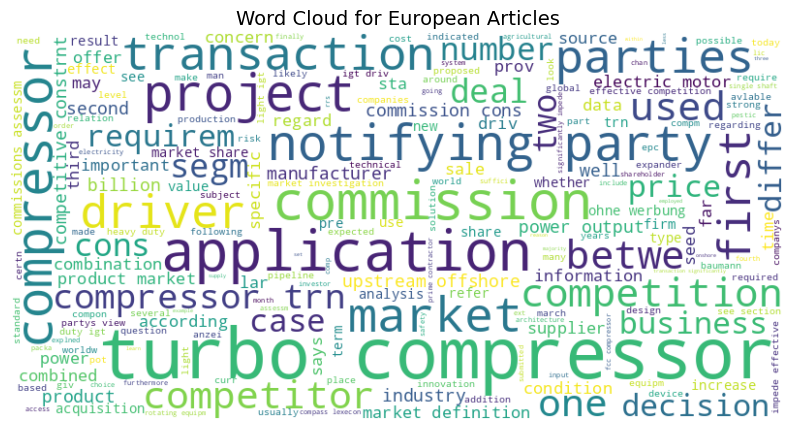

In [56]:
from wordcloud import WordCloud

# Word Cloud Function
def generate_filtered_wordcloud(texts, exclude_words, title):
    combined_text = " ".join(preprocess_text(text, exclude_words) for text in texts)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text)

    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=14)
    plt.show()

# Generate Word Clouds
generate_filtered_wordcloud(us_articles, exclude_words, "Word Cloud for U.S. Articles")
generate_filtered_wordcloud(europe_articles, exclude_words, "Word Cloud for European Articles")

In [57]:
# Example table for top terms
us_top_keywords = [term for term, _ in us_tfidf]
europe_top_keywords = [term for term, _ in europe_tfidf]

summary_df = pd.DataFrame({
    "Top U.S. Keywords": us_top_keywords,
    "Top Europe Keywords": europe_top_keywords
})

print("\nSummary of Regional Differences:")
print(summary_df)


Summary of Regional Differences:
   Top U.S. Keywords Top Europe Keywords
0               deal          commission
1            billion                deal
2        transaction         transaction
3        competition         competition
4           proposed              market
5        divestiture          compressor
6                ftc               power
7          companies                chip
8               crop        architecture
9              power            proposed
10             drugs             billion
11             phase              source
12          combined            business
13          companys         acquisition
14            statem               turbo
15      shareholders            concerns
16             trump               seeds
17              seed              likely
18              pres          innovation
19    pharmaceutical              scroll


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
